# 📝 Exploratory Data Analysis (EDA) Checklist

## 1. Data upload
- [X] Import libraries (`pandas`, `seaborn`, `matplotlib`)
- [X] Load processed dataset (`data/processed/churn_clean.csv`)

## 2. Initial exploration
- [X] View dataset dimensions (`df.shape`)
- [X] Show first rows (`df.head()`)
- [X] Review data types (`df.dtypes`)
- [X] Descriptive statistics (`df.describe()`)

## 3. Data quality
- [X] Check for missing values (`df.isnull().sum()`)
- [ ] Duplicate values (`df.duplicated().sum()`)

## 4. Target variable (`Churn`)
- [X] Class distribution (`value_counts`)
- [X] Visualization class balance (`countplot`)

## 5. Univariate distributions
- [X] Histograms for numerical variables
- [X] Barchart for categorical variables

## 6. Bivariate relationship with `Churn`
- [X] Boxplots for numerical variables
- [X] Contingency tables for categorical variables

## 7. Correlations
- [X] Correlation matrix (`df.corr()`)
- [X] Correlation heatmap

## 8. Preliminary insights
- [ ] Summary of key findings
- [ ] Candidates variables for modeling


----

# 1. Data upload

----


## Import libraries


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from src.config import DATA_PROCESSED

ModuleNotFoundError: No module named 'scipy'

### Aesthetic configuration


In [ ]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 5)



## Load processed dataset

In [ ]:
df = pd.read_csv(DATA_PROCESSED)

# The CustomerID column is deleted
df = df.drop(columns=["customerID"])

----

# 2. Initial exploration

----


## View dataset dimensions


In [ ]:
print("Shape:", df.shape)

Shape: (7043, 20)


## Show first rows


In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Review data types


In [ ]:
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


### Finding 1: Inconsistent data type in `TotalCharges`
- The variable `TotalCharges` was read as `object` instead of `float64`.
- Let's look at the first 50 unique values of the variable.

In [ ]:
print(df["TotalCharges"].unique()[:50]) 

['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95' '587.45' '326.8' '5681.1' '5036.3' '2686.05'
 '7895.15' '1022.95' '7382.25' '528.35' '1862.9' '39.65' '202.25' '20.15'
 '3505.1' '2970.3' '1530.6' '4749.15' '30.2' '6369.45' '1093.1' '6766.95'
 '181.65' '1874.45' '20.2' '45.25' '7251.7' '316.9' '3548.3' '3549.25'
 '1105.4' '475.7' '4872.35' '418.25' '4861.45' '981.45' '3906.7' '97'
 '144.15' '4217.8' '4254.1']



- Let's see how many NaN values are detected.


In [ ]:
print(df["TotalCharges"].isna().sum()) 

0


No NaN values are returned.
- We look for suspicious strings (such as spaces).


In [ ]:
df.loc[df["TotalCharges"].str.strip() == "", "TotalCharges"].count()

np.int64(11)

Since the problem values are few, we force the conversion to numeric values.
- Convert the column to numeric, forcing errors.


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


- Review the created NaNs

In [ ]:
print("Null values after conversion:", df["TotalCharges"].isna().sum())


Null values after conversion: 11


- Since the number of NaN values obtained is less than 1% of the data, we eliminate them.

In [ ]:
df = df.dropna(subset=["TotalCharges"])

## Descriptive statistics

In [ ]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032.0,NaN,NaN,NaN,0.1624,0.368844,0.0,0.0,0.0,0.0,1.0
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7032.0,NaN,NaN,NaN,32.421786,24.54526,1.0,9.0,29.0,55.0,72.0
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7032,3,No,3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----
# 3. Data quality
----

## Missing values

In [ ]:
print("Null values per column:")
print(df.isnull().sum())

Null values per column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


No null values were found in any column.


## Duplicate values

In [ ]:

print("Duplicates:", df.duplicated().sum())

Duplicates: 22


No duplicate values were found.

----
# 4. Target variable `churn`
----

## Class distribution

In [ ]:
print(df["Churn"].value_counts(normalize=True))

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64



According to these results, the company is rapidly losing customers.

## Class balance

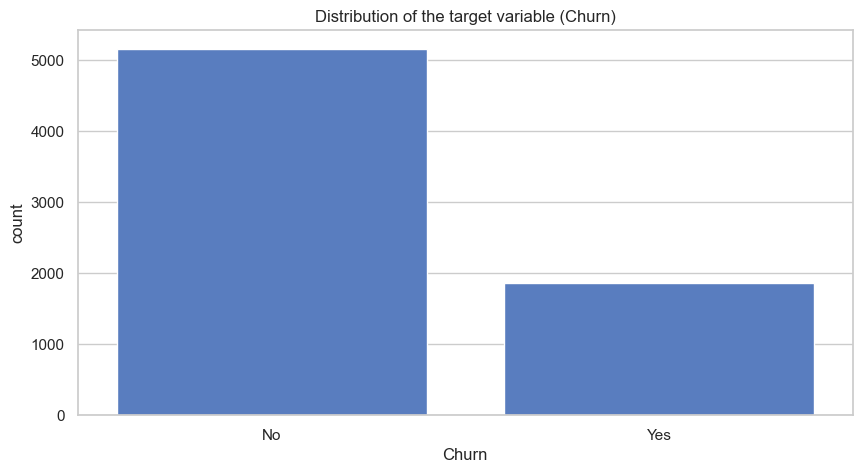

In [ ]:
sns.countplot(x="Churn", data=df)
plt.title("Distribution of the target variable (Churn)")
plt.show()

----
# 5. Univariate distributions
----

### Numeric variables

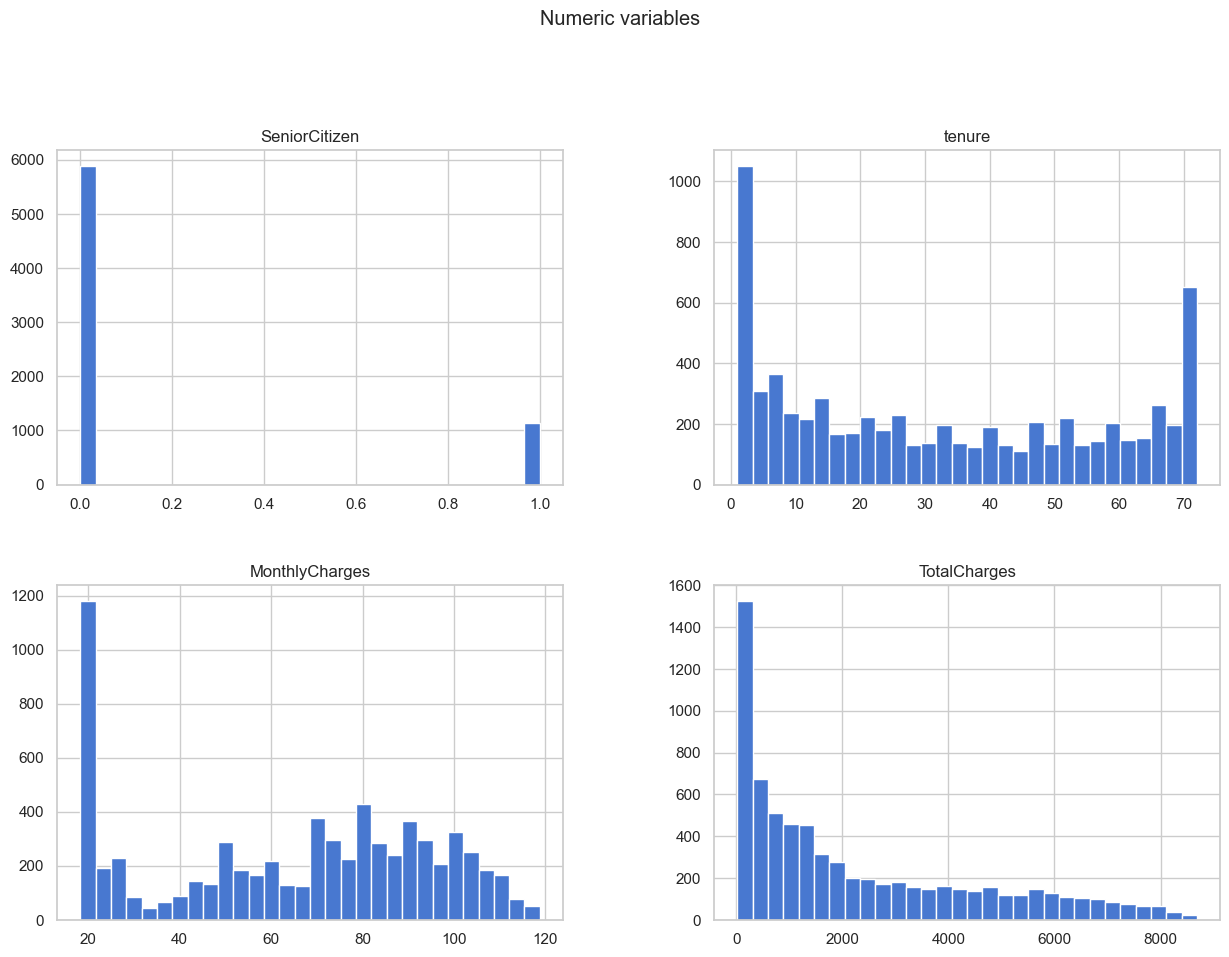

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Numeric variables", y=1.02)
plt.show()

### Categorical variables

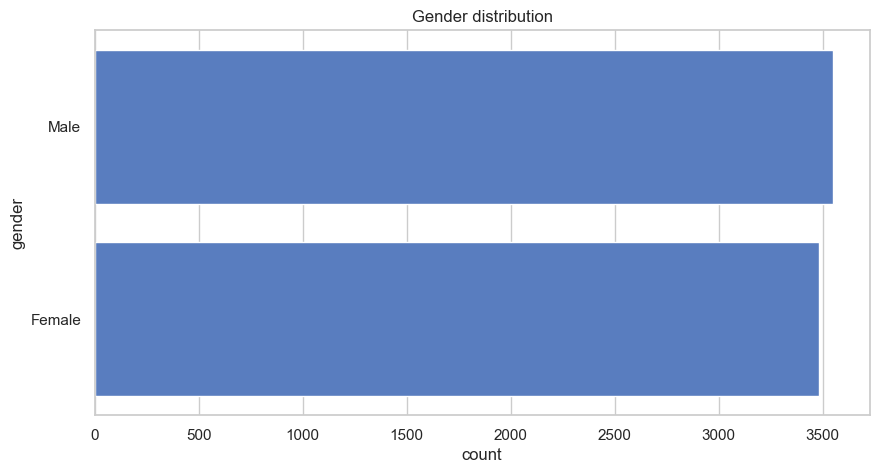

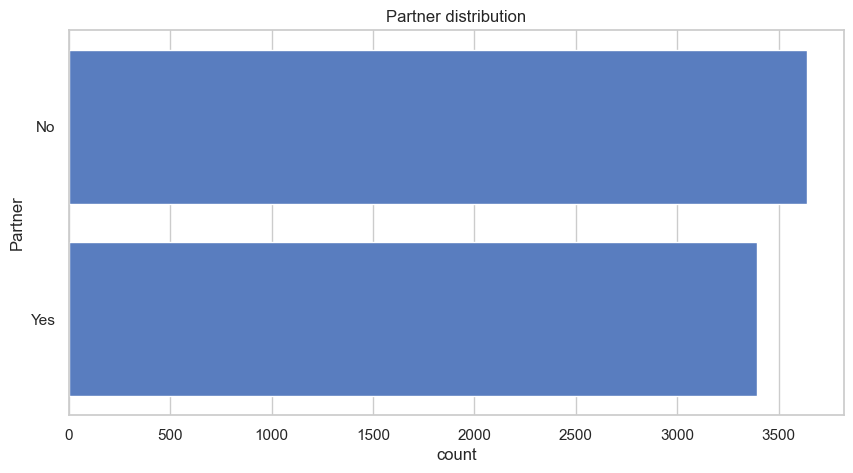

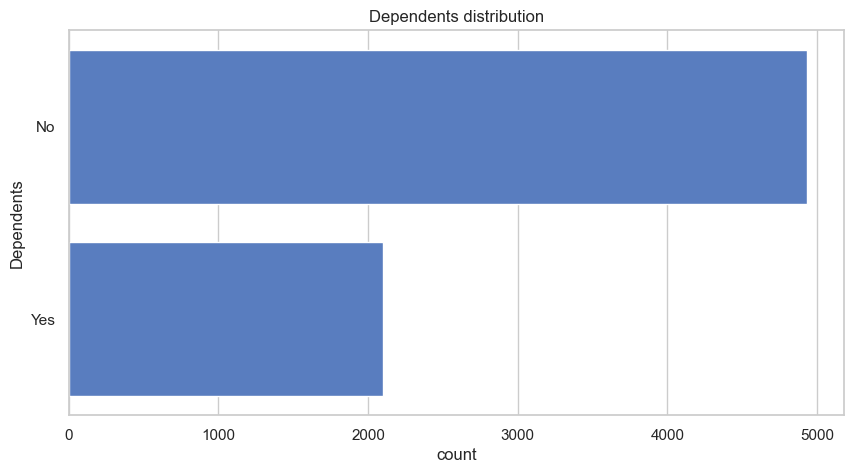

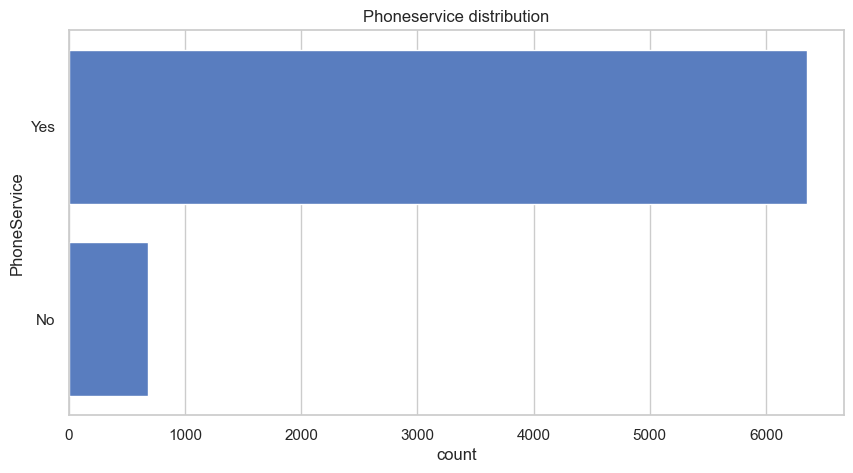

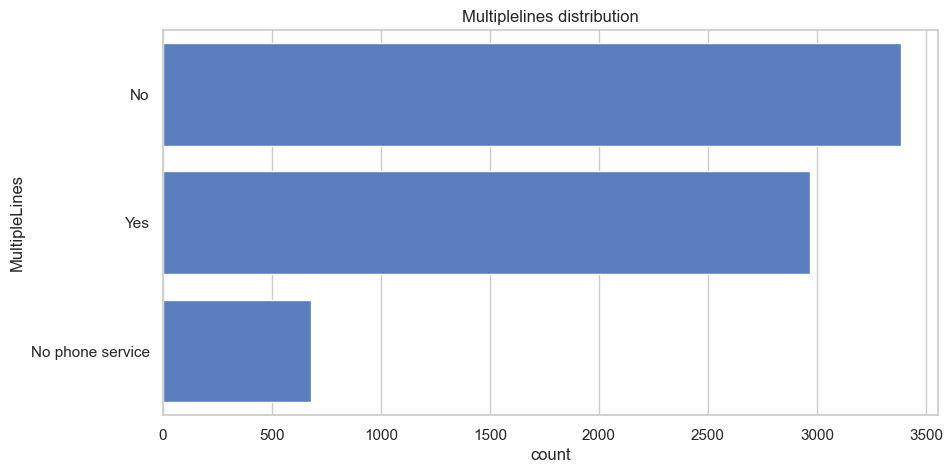

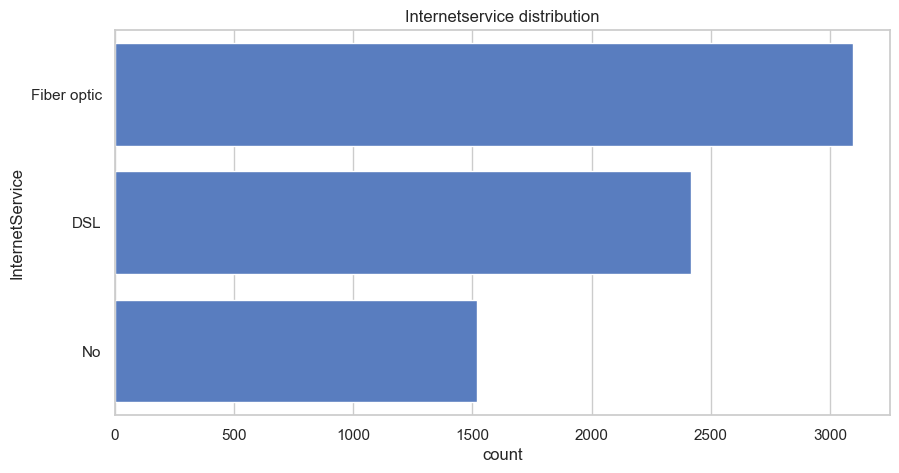

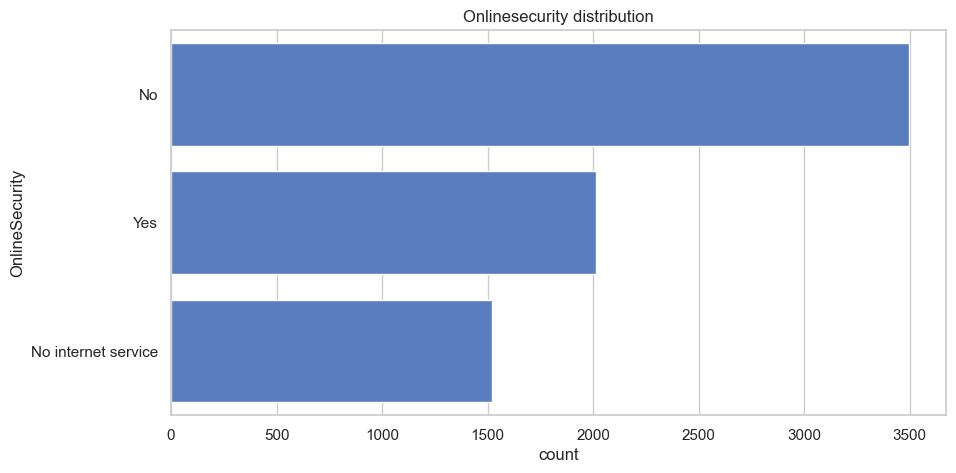

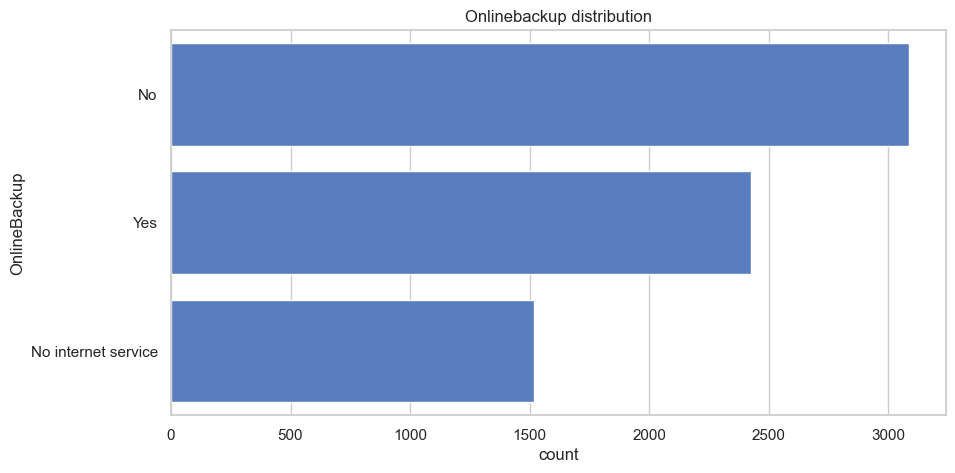

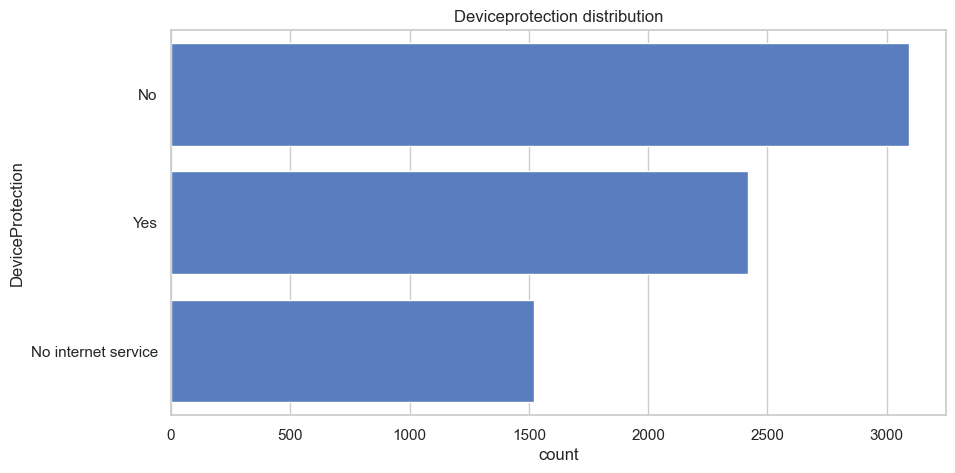

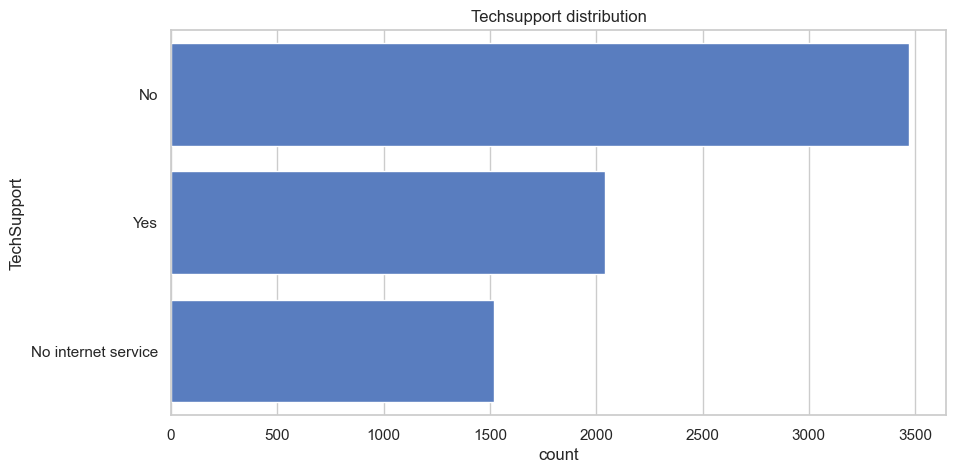

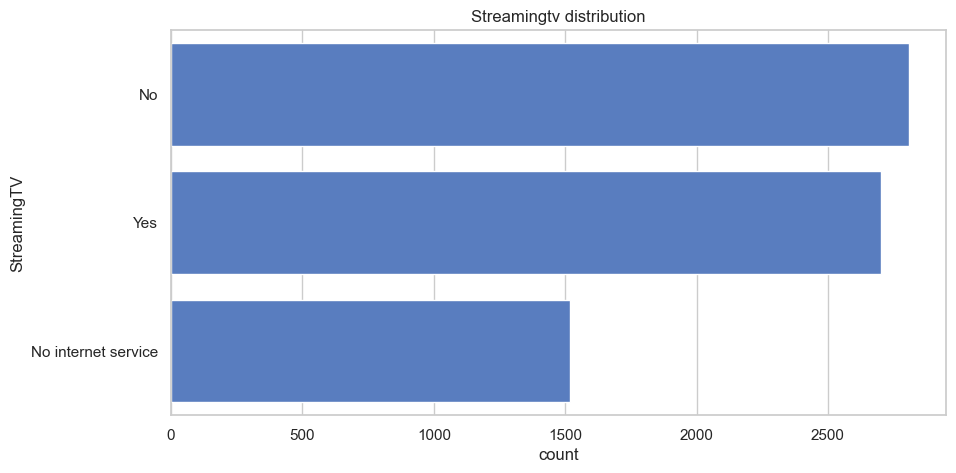

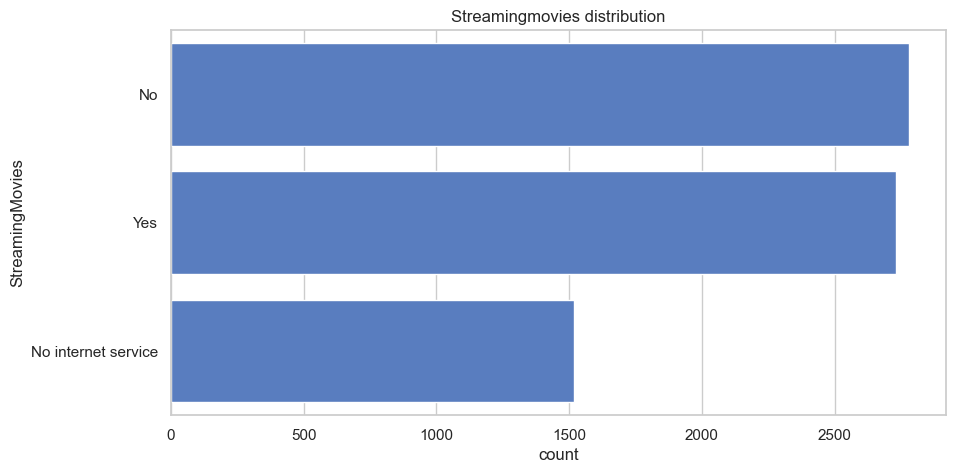

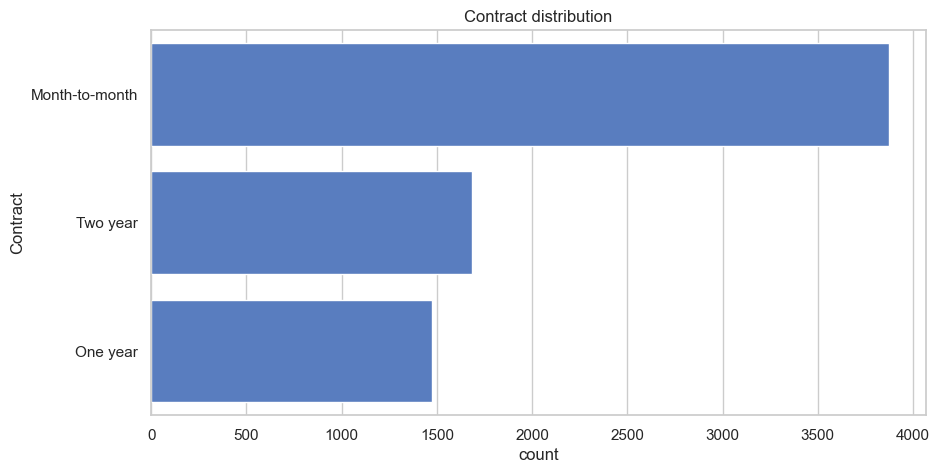

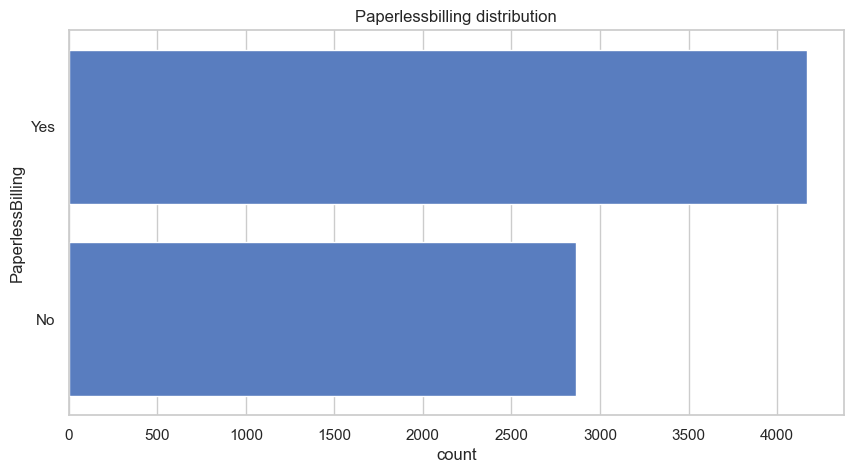

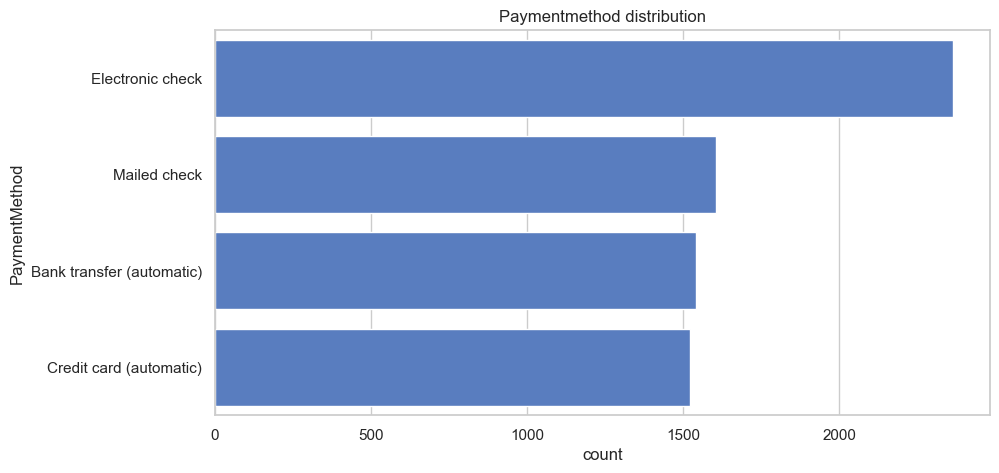

In [ ]:
for col in df.select_dtypes(include="object").columns:
    if col != "Churn":
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f"{col.capitalize()} distribution")
        plt.show()

----
# 6. Bivariate relationship with `Churn`
----

## Boxplots for numerical variables

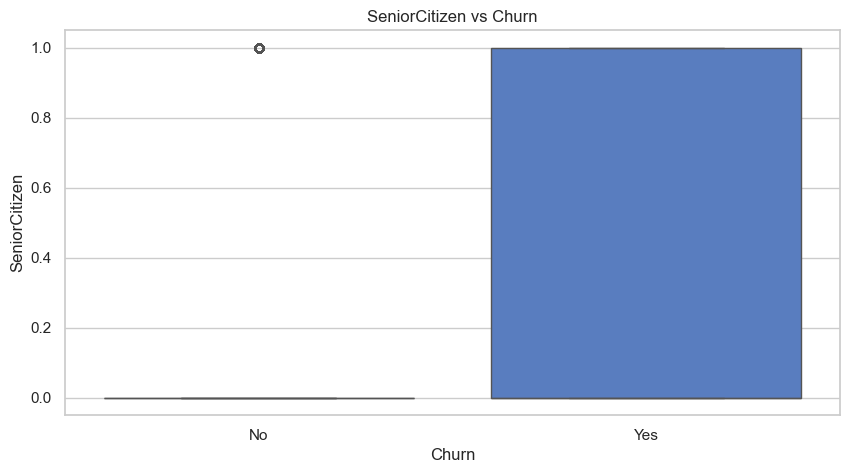

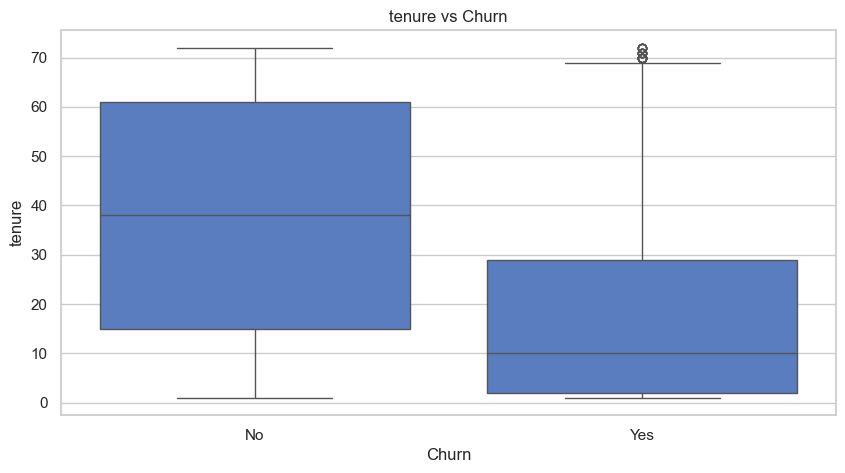

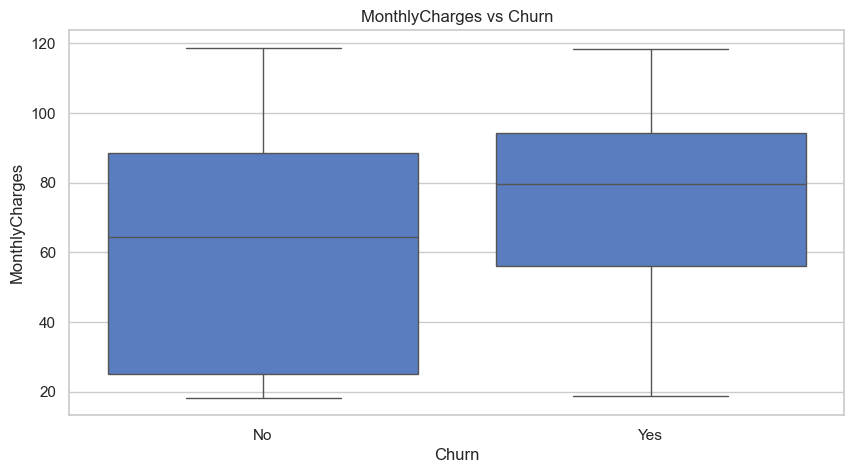

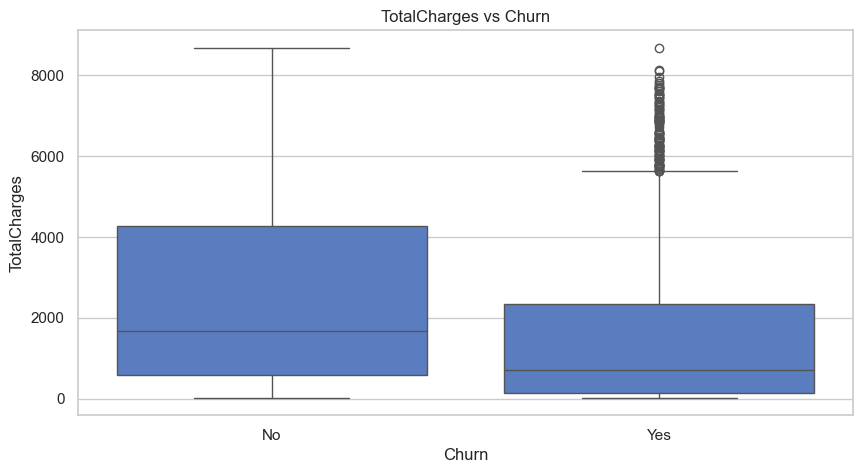

In [ ]:
for col in df.select_dtypes(include="number").columns:
    if col != "Churn":
        sns.boxplot(x="Churn", y=col, data=df)
        plt.title(f"{col} vs Churn")
        plt.show()

## Contingency tables for categorical variables

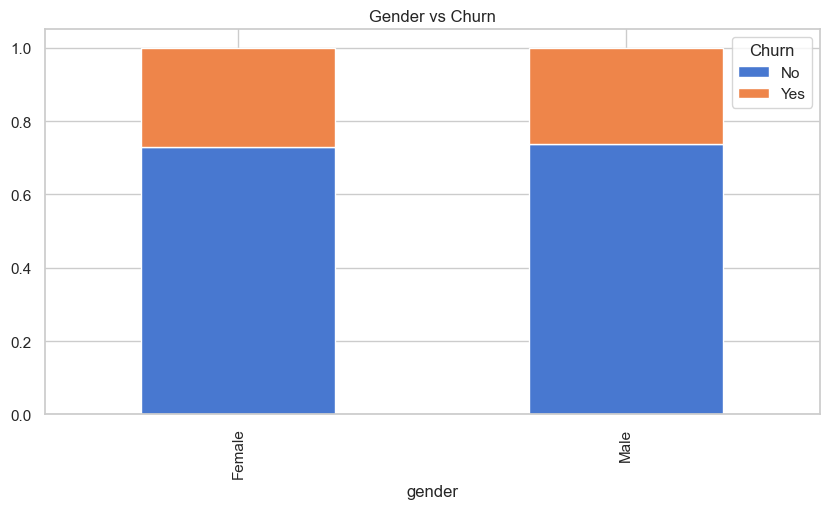

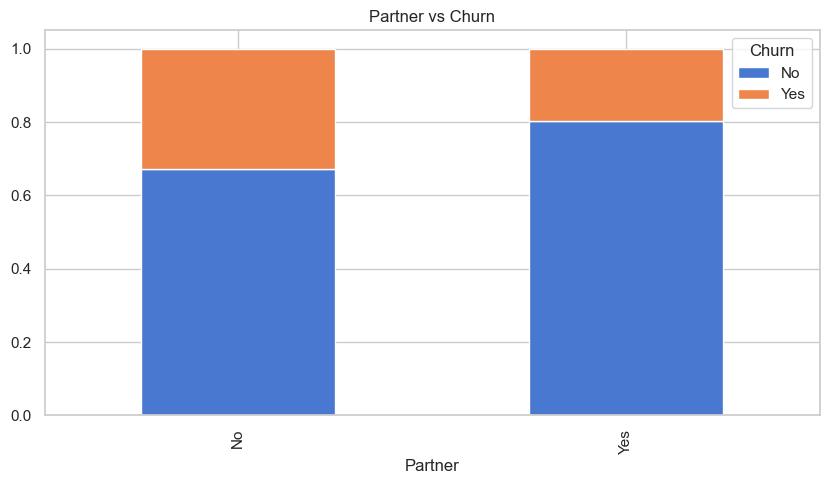

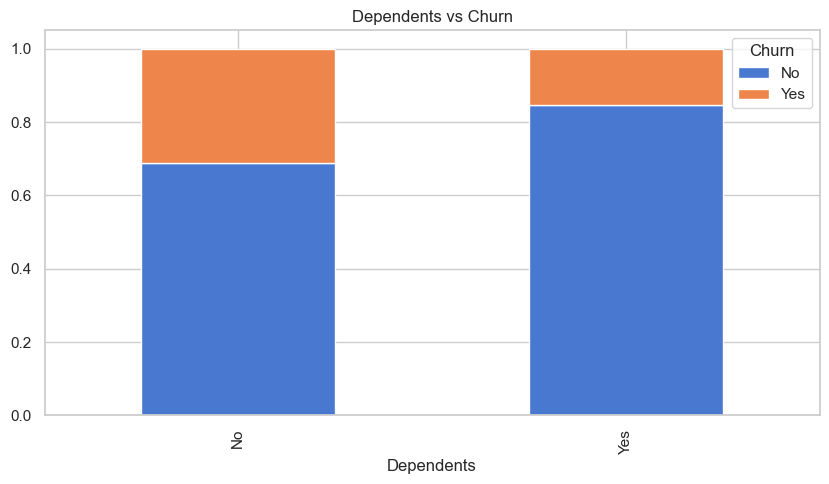

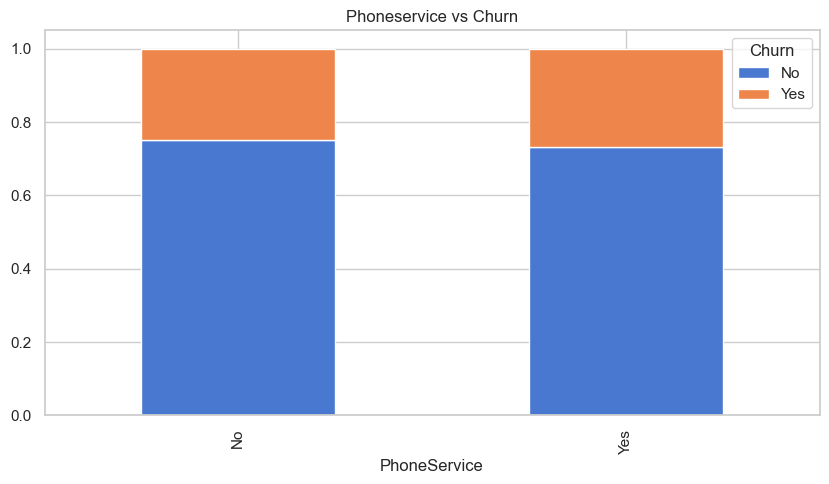

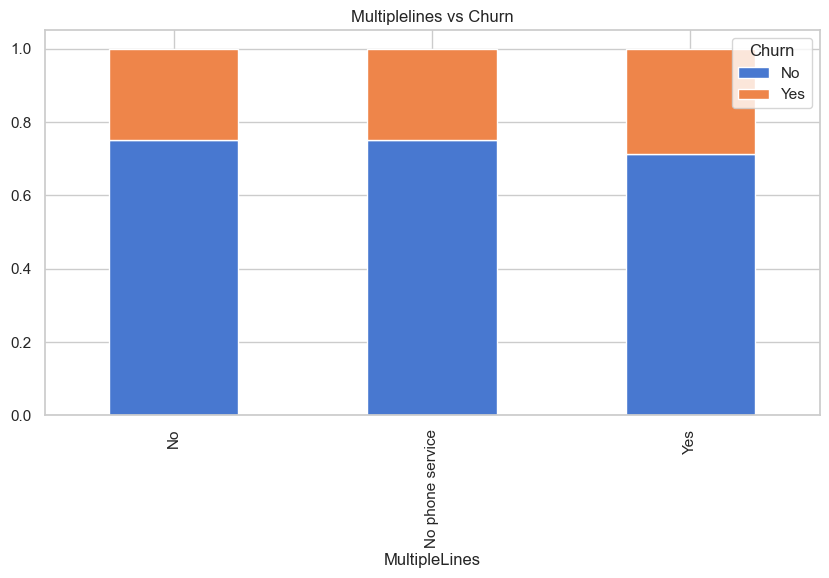

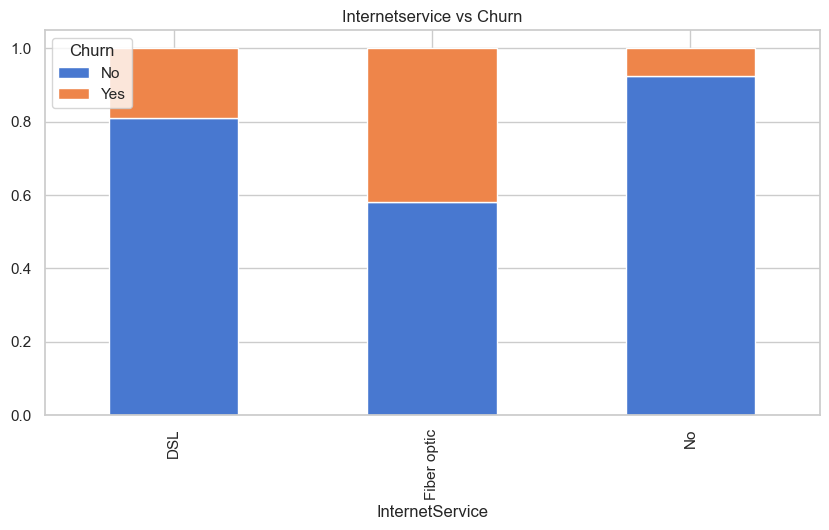

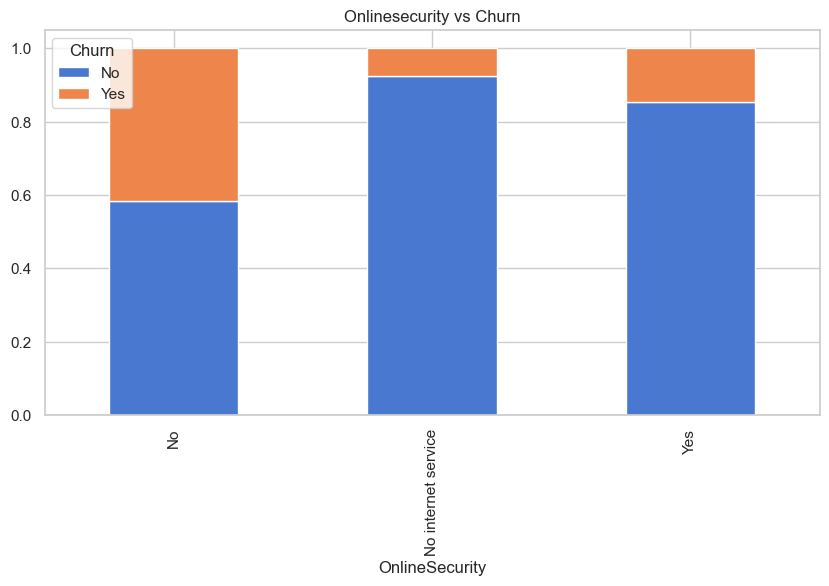

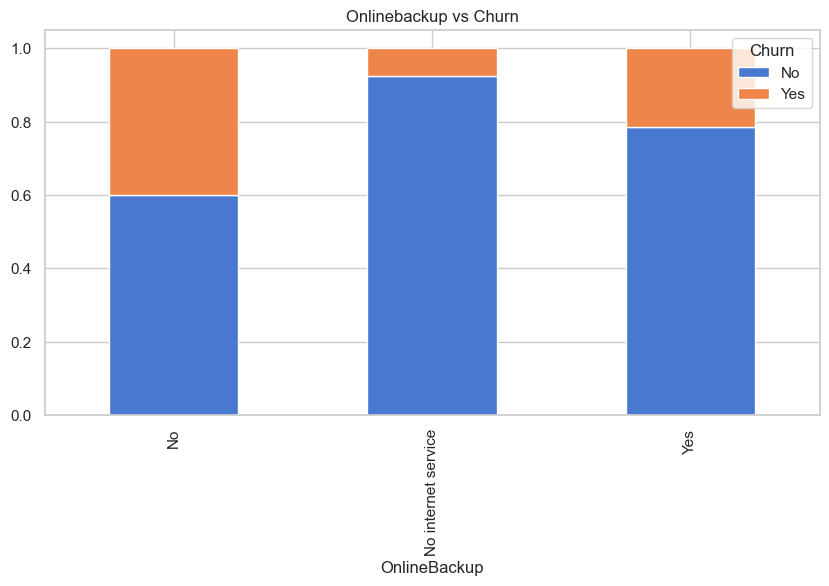

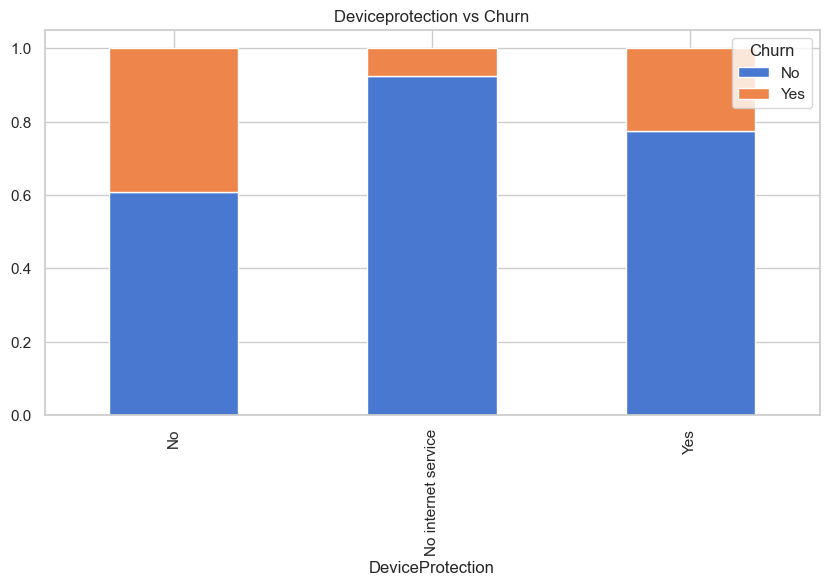

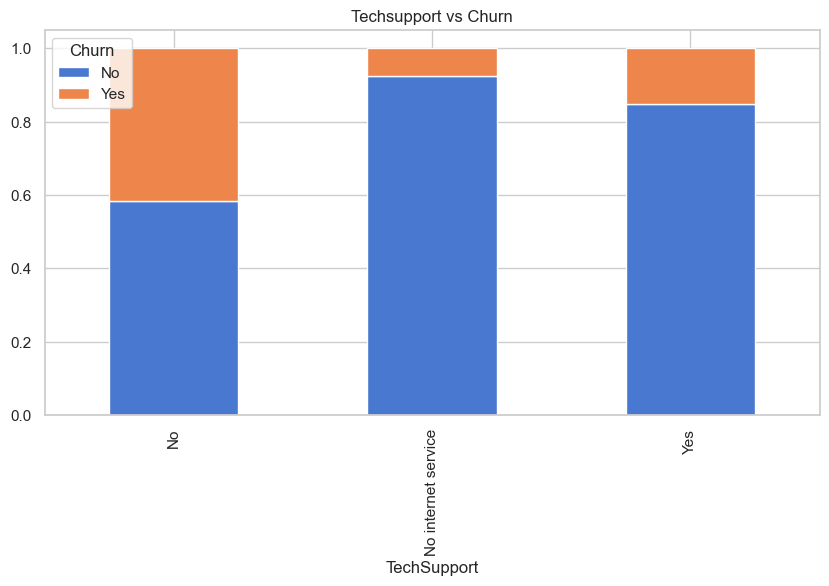

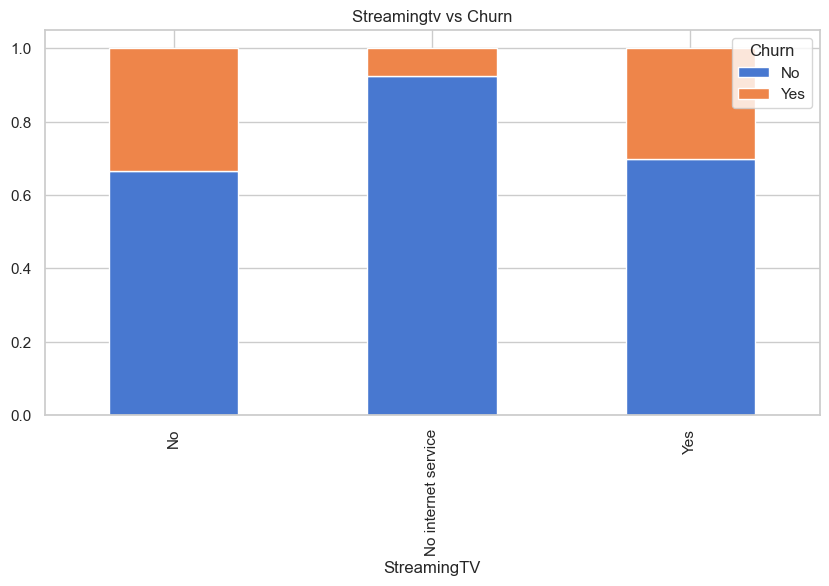

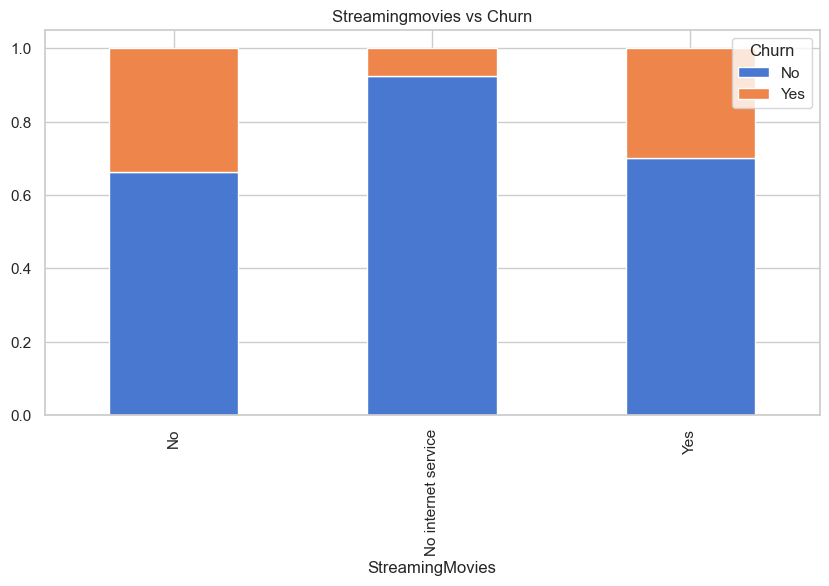

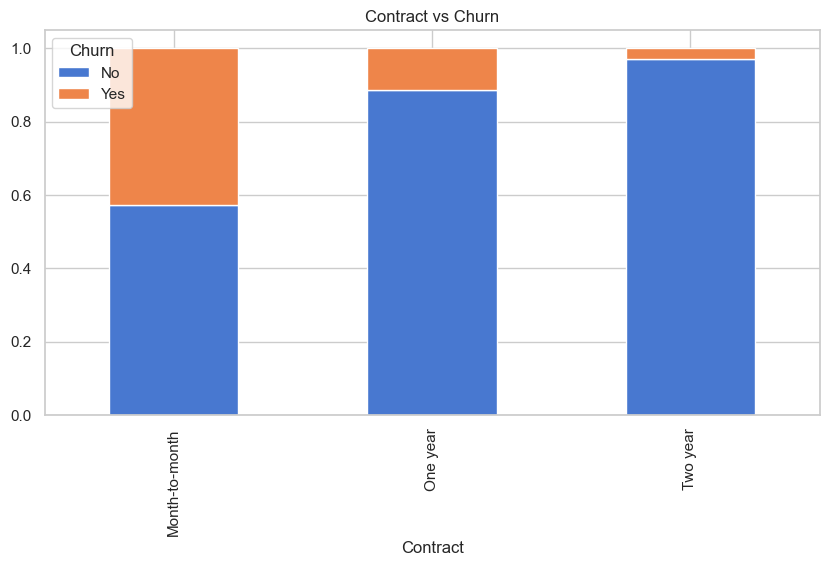

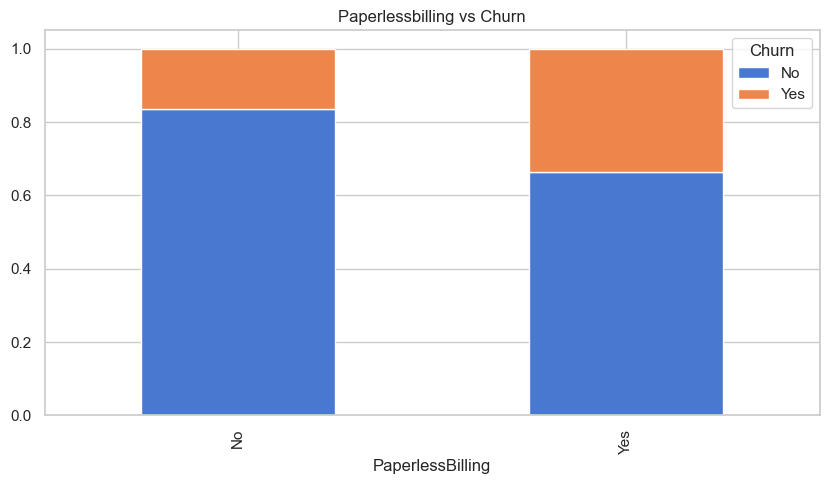

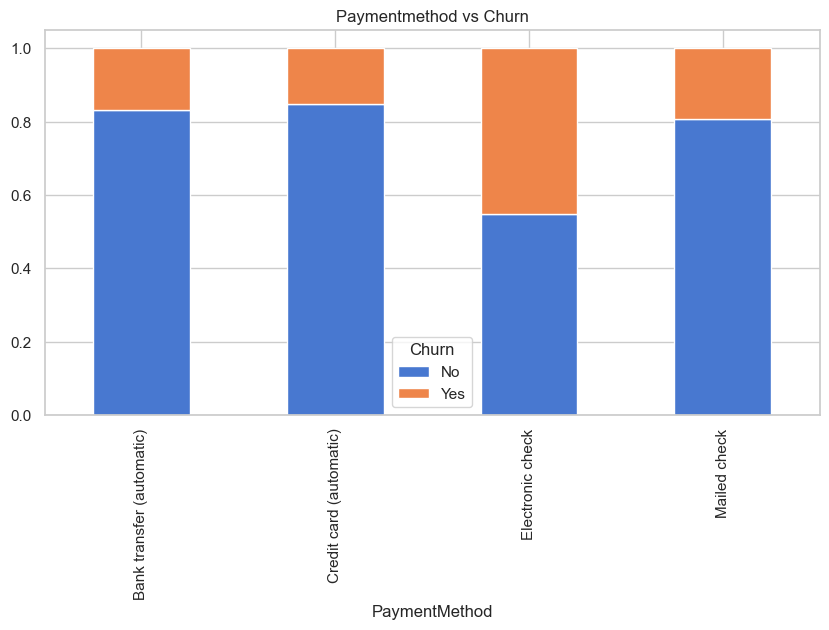

In [ ]:
for col in df.select_dtypes(include="object").columns:
    if col != "Churn":
        ct = pd.crosstab(df[col], df["Churn"], normalize="index")
        ct.plot(kind="bar", stacked=True)
        plt.title(f"{col.capitalize()} vs Churn")
        plt.show()

----
# 7. Correlations
----


## Correlation matrix

In [ ]:
corr = df.corr(numeric_only=True)
print(corr)


                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015683        0.219874      0.102411
tenure               0.015683  1.000000        0.246862      0.825880
MonthlyCharges       0.219874  0.246862        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


## Correlation heatmap

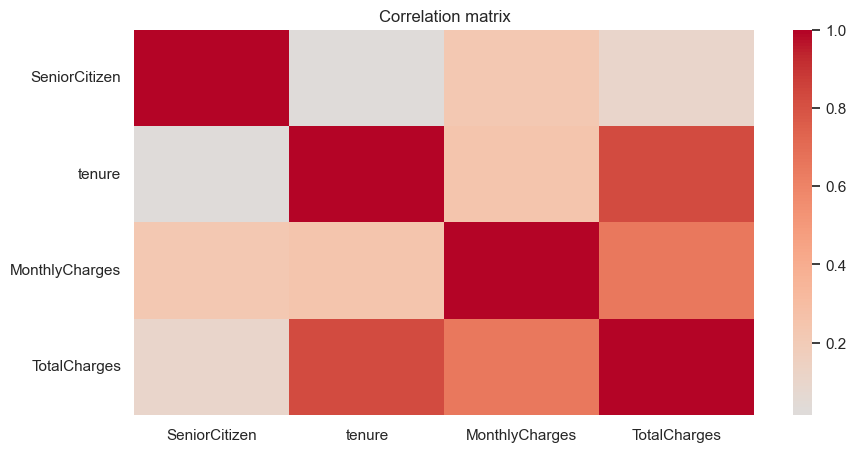

In [ ]:
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation matrix")
plt.show()

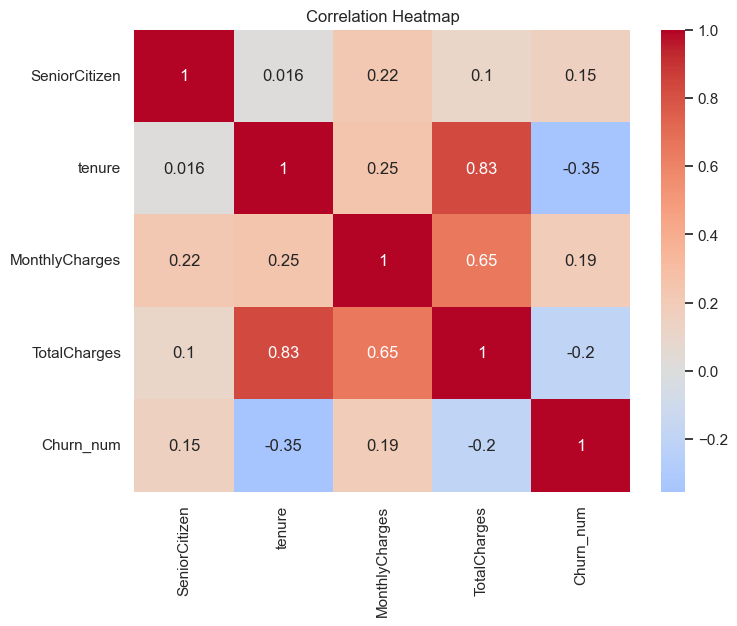

Churn_num         1.000000
MonthlyCharges    0.192858
SeniorCitizen     0.150541
TotalCharges     -0.199484
tenure           -0.354049
Name: Churn_num, dtype: float64


In [ ]:
# Convert Churn to numeric
df["Churn_num"] = df["Churn"].map({"Yes": 1, "No": 0})

# Correlation with Churn
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Correlation of each variable with Churn
print(corr["Churn_num"].sort_values(ascending=False))


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_vars = df.select_dtypes(include=["object"]).columns.drop("customerID")

chi2_results = {}
for col in categorical_vars:
    contingency = pd.crosstab(df[col], df["Churn"])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results[col] = p

print("Chi-square test p-values (categorical vs Churn):")
for col, pval in sorted(chi2_results.items(), key=lambda x: x[1]):
    print(f"{col}: p-value = {pval:.5f}")


ModuleNotFoundError: No module named 'scipy'

----
# 8. Preliminary insights
----

## Summary of key findings